In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Kaggle ML & DS Survey 2019 Analysis

In [23]:
df=pd.read_csv("multiple_choice_responses.csv",low_memory=False) #Reading Survey Answers
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [35]:
print("Number of Survey takers:",df.shape[0]-1)

Number of Survey takers: 19717


In [24]:
df.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q2_OTHER_TEXT',
       'Q3', 'Q4', 'Q5', 'Q5_OTHER_TEXT', 'Q6', 'Q7',
       ...
       'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6', 'Q34_Part_7', 'Q34_Part_8',
       'Q34_Part_9', 'Q34_Part_10', 'Q34_Part_11', 'Q34_Part_12',
       'Q34_OTHER_TEXT'],
      dtype='object', length=246)

In [4]:
df.isnull().sum()

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q2_OTHER_TEXT                              0
Q3                                         0
                                       ...  
Q34_Part_9                             19238
Q34_Part_10                            19191
Q34_Part_11                            18472
Q34_Part_12                            19430
Q34_OTHER_TEXT                             0
Length: 246, dtype: int64

In [5]:
df_ques=pd.read_csv("questions_only.csv")# Reading the Question Schema
df_ques.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,...,Which categories of ML tools do you use on a r...,Which categories of computer vision methods do...,Which of the following natural language proces...,Which of the following machine learning framew...,Which of the following cloud computing platfor...,Which specific cloud computing products do you...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which of the following relational database pro...


In [6]:
i=0
for q in df_ques.iloc[0]:
    print(i,q)
    i=i+1

0 Duration (in seconds)
1 What is your age (# years)?
2 What is your gender? - Selected Choice
3 In which country do you currently reside?
4 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
5 Select the title most similar to your current role (or most recent title if retired): - Selected Choice
6 What is the size of the company where you are employed?
7 Approximately how many individuals are responsible for data science workloads at your place of business?
8 Does your current employer incorporate machine learning methods into their business?
9 Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice
10 What is your current yearly compensation (approximate $USD)?
11 Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?
12 Who/what are your favorite media sources that report on data science t

# Top 10 Countries

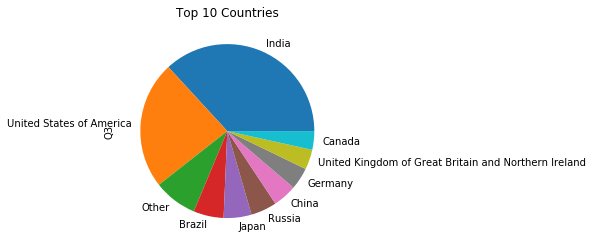

In [7]:
df['Q3'].value_counts().head(10).plot(kind='pie',title="Top 10 Countries")

# India being the largest country. Let us answer some questions regarding India

In [8]:
df=df[df['Q3']=="India"].reset_index()#Selecting only Indian responses
df=df.drop('index',axis=1)

In [9]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,529,22-24,Male,-1,India,Master’s degree,Data Scientist,-1,50-249 employees,20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,290,18-21,Male,-1,India,Some college/university study without earning ...,Student,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,524,25-29,Male,-1,India,Bachelor’s degree,Other,3,"1000-9,999 employees",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


# Part I: What is the gender distribution in the field?¶


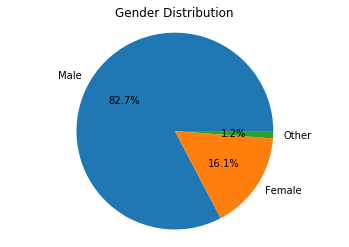

In [11]:
labels = ['Male', 'Female', 'Other']
sizes = [df['Q2'].value_counts()[0],
         df['Q2'].value_counts()[1],
         df['Q2'].value_counts()[2]+df['Q2'].value_counts()[3]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Gender Distribution')
plt.show()

# Part II: Do people with postgraduate degree earn more in India?¶


In [16]:
#Considering only working professionals having a college degree
undergrad = ['Bachelor’s degree'] 
postgrad=['Master’s degree','Doctoral degree']
unemployed=['Student','Not employed']

In [17]:
employed_df = df.loc[~df['Q5'].isin(unemployed)] 

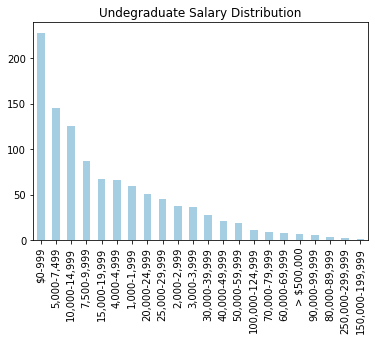

In [18]:
employed_df.loc[employed_df['Q4'].isin(undergrad)]['Q10'].dropna().value_counts().plot.bar(colormap='Paired',title="Undegraduate Salary Distribution");

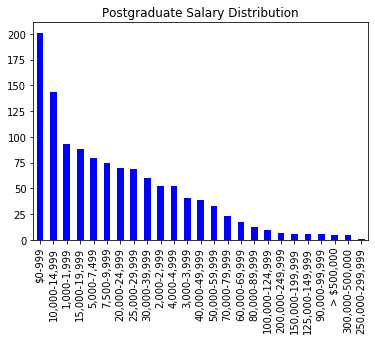

In [19]:
employed_df.loc[employed_df['Q4'].isin(postgrad)]['Q10'].dropna().value_counts().plot.bar(colormap='winter',title="Postgraduate Salary Distribution");

# Part III: What job roles most Indian Kagglers have?¶


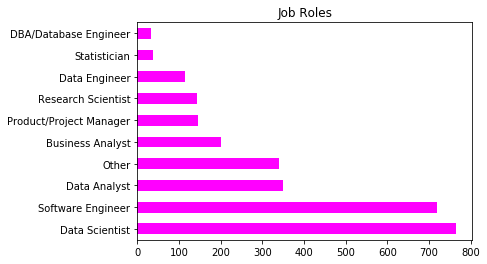

In [20]:
employed_df["Q5"].dropna().value_counts().plot.barh(colormap='spring',title="Job Roles");

# Part IV: What is the age distribution of Indian Kagglers?

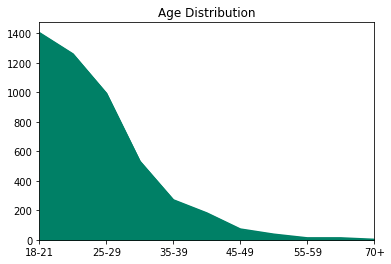

In [21]:
df['Q1'].value_counts().plot(kind='area',colormap='summer',title='Age Distribution');